### Imports & declarations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split

import keras
from keras.preprocessing.image import img_to_array, load_img, array_to_img, ImageDataGenerator
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

LOCAL_PATH_MINI = '../data/raw/kaggle_mini_subsample'
LOCAL_PATH_TRAIN = '../data/raw/train'
COLAB_PATH_TRAIN = '/content/drive/MyDrive/Data Science/Colab Notebooks/Module 4 Project/data/raw/train'
COLAB_PATH_MINI = '/content/drive/MyDrive/Data Science/Colab Notebooks/Module 4 Project/data/raw/mini_subsample'

RANDOM_STATE = 2020

# Comment when running locally, uncomment for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Define basic functions

In [ ]:
function ClickConnect(){
    console.log("Working"); 
    document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)

In [3]:
def make_flat(x):
    s = x.shape
    dim_0 = s[0]
    dim_1 = s[1]*s[2]*s[3]
    x_flat = x.reshape(dim_0, dim_1)
    shape = (x_flat.shape[1],)
    return x_flat, shape

### Import & Clean: Mini Dataset

Found 186 images belonging to 2 classes.


'Example image:'

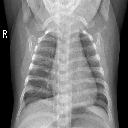

Indices: {'NORMAL': 0, 'PNEUMONIA': 1}
Dataset shape: (186, 128, 128, 3)


In [ ]:
BATCH_SIZE = 250
TARGET_SIZE = [128, 128]

path = COLAB_PATH_MINI
image_generator = ImageDataGenerator().flow_from_directory(path, batch_size=BATCH_SIZE, target_size=TARGET_SIZE);
images, labels = next(image_generator)
images_scaled = images / 255

display('Example image:', array_to_img(images[0]))
print('Indices:', image_generator.class_indices)
print('Dataset shape:', images_scaled.shape)

### Model: Mini Dataset

In [ ]:
x, shape = make_flat(images_scaled)

model = Sequential()
model.add(Dense(8, activation='relu', input_shape = shape))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=x, y=labels, epochs=50)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3145792   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 3,145,922
Trainable params: 3,145,922
Non-trainable params: 0
_________________________________________________________________


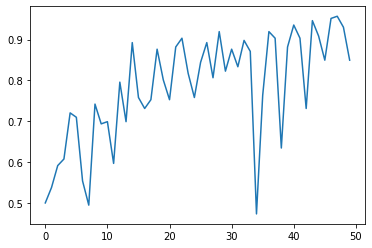

In [ ]:
acc = history.history['accuracy']
plt.plot(range(len(acc)), acc);
plt.title('Training accuracy for mini dataset')

### Import and clean: Full Dataset

In [25]:
path = COLAB_PATH_TRAIN
BATCH_SIZE = 32
data_tf = tf.keras.preprocessing.image_dataset_from_directory(path, 
                                                image_size=(8, 8), # WORKS UP TO 256
                                                batch_size=BATCH_SIZE,
                                                seed=RANDOM_STATE)

Found 5232 files belonging to 2 classes.


In [26]:
path = COLAB_PATH_TRAIN
BATCH_SIZE = 32
data_tf = tf.keras.preprocessing.image_dataset_from_directory(path, 
                                                image_size=(8, 8), # WORKS UP TO 256
                                                batch_size=BATCH_SIZE,
                                                seed=RANDOM_STATE)

for i, item in enumerate(data_tf.as_numpy_iterator()):
    if i == 0:
        images = np.array(item[0])
        labels = np.array(item[1])
    else:
        images = np.concatenate([images, item[0]], axis=0)
        labels = np.concatenate([labels, item[1]], axis=0)
        if i % 5 == 0:
            print(int(i/(5232/BATCH_SIZE)*100), '%')

images /= 256

data_tf = None # clear RAM
print('Data shape:', images.shape)

Found 5232 files belonging to 2 classes.
3 %
6 %
9 %
12 %
15 %
18 %
21 %
24 %
27 %
30 %
33 %
36 %
39 %
42 %
45 %
48 %
51 %
55 %
58 %
61 %
64 %
67 %
70 %
73 %
76 %
79 %
82 %
85 %
88 %
91 %
94 %
97 %
Data shape: (5232, 8, 8, 3)


In [36]:
labels.reshape(-1,1).shape

(5232, 1)

In [37]:
np.concatenate([labels.reshape(-1,1), labels.reshape(-1,1)], axis=1).shape


(5232, 2)

In [12]:
item[1]

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [3]:
# BATCH_SIZE_TRAIN = 1341+3875
# TARGET_SIZE = [256, 256]

# path = COLAB_PATH_TRAIN

# t0 = time.time()
# generator = ImageDataGenerator().flow_from_directory(path,
#                                                      #batch_size=BATCH_SIZE_TRAIN,
#                                                      target_size=TARGET_SIZE)

# images, labels = next(generator)
# images = images / 256
# t1 = time.time()

# print('Runtime:', t1-t0)
# print(images.shape, labels.shape)

Found 5232 images belonging to 2 classes.
Runtime: 488.08068585395813
(5216, 256, 256, 3) (5216, 2)


### Full train dataset, no validation dataset

##### Create and fit model

In [ ]:
x, shape = reshape_flat(images_scaled)

model = Sequential()
model.add(Dense(TARGET_SIZE[0], activation='relu', input_shape = shape))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy', 'mse'])
model.summary()

history = model.fit(x=x, y=labels_train, epochs=50, validation_split=0.25, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 196       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
Total params: 206
Trainable params: 206
Non-trainable params: 0
_________________________________________________________________


##### Plot results

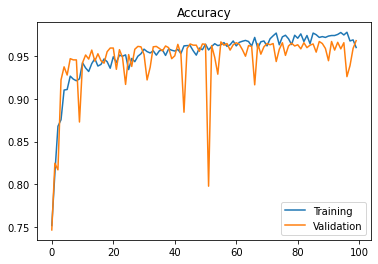

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epoch_ct = range(len(acc_train))

plt.plot(epoch_ct, acc_train, label='Training')
plt.plot(epoch_ct, acc_val, label='Validation')
plt.title('Accuracy')
plt.legend();

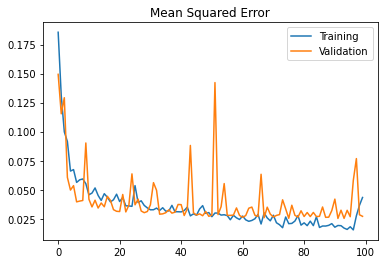

In [ ]:
history.history.keys()

mse_train = history.history['mse']
mse_val = history.history['val_mse']
epoch_ct = range(len(mse_train))

plt.plot(epoch_ct, mse_train, label='Training')
plt.plot(epoch_ct, mse_val, label='Validation')
plt.title('Mean Squared Error')
plt.legend();

### Create balanced dataset

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(images, labels, 
                                                  random_state=RANDOM_STATE, 
                                                  test_size = 0.25)
images = None # clear memory

In [ ]:
y_train.shape

In [7]:
# Oversample the minority class: 
# https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#oversample_the_minority_class
np.random.seed(RANDOM_STATE)


print(data_tf.class_indices)
ind_neg = y_train[:, 0]==1
ind_pos = y_train[:, 0]==0

neg_ct = ind_neg.sum()
pos_ct = ind_pos.sum()
print('NORMAL count:', neg_ct, ', PNEUMONIA count:', pos_ct)

ids = np.arange(neg_ct)

# Select random entries from the list of inputs
ind_add_ons = np.random.choice(ids, size=pos_ct-neg_ct)
add_ons_x = x_train[ind_neg][ind_add_ons]
add_ons_y = y_train[ind_neg][ind_add_ons]

x_train_balanced = np.concatenate([x_train, add_ons_x], axis=0)
y_train_balanced = np.concatenate([y_train, add_ons_y], axis=0)
print('Training sizes after resampling:', x_train_balanced.shape, y_train_balanced.shape)
print('NORMAL count, PNEUMONIA count:', y_train_balanced.sum(axis=0))

# clear memory
x_train = None
y_train = None

IndexError: ignored

### Create model with resampled dataset

In [ ]:
x_train_flat, shape = reshape_flat(x_train_balanced)
x_val_flat, _ = reshape_flat(x_val)

model = Sequential()
model.add(Dense(256, activation='relu', input_shape = shape))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy', 'mse'])

In [ ]:
history = model.fit(x=x_train_flat, y=y_train_balanced, epochs=50, validation_data=(x_val_flat, y_val))
model.summary()

### Incorporate Early Stopping

In [ ]:
early_stopping = [EarlyStopping(monitor='val_loss', patience=10),
                 ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)]

history = model.fit(x=x_train_flat, y=y_train_balanced, 
                    callbacks=early_stopping,
                    epochs=250, 
                    validation_data=(x_val_flat, y_val))

best_model = keras.models.load_model('best_model.h5')
best_model.summary()

Epoch 1/250
182/182 [==============================] - 8s 47ms/step - loss: 0.0574 - accuracy: 0.9805 - mse: 0.0152 - val_loss: 0.3845 - val_accuracy: 0.8942 - val_mse: 0.0842
Epoch 2/250
182/182 [==============================] - 9s 47ms/step - loss: 0.1367 - accuracy: 0.9292 - mse: 0.0395 - val_loss: 0.3103 - val_accuracy: 0.9095 - val_mse: 0.1032
Epoch 3/250
182/182 [==============================] - 8s 43ms/step - loss: 0.2645 - accuracy: 0.9521 - mse: 0.0820 - val_loss: 0.1537 - val_accuracy: 0.9433 - val_mse: 0.0424
Epoch 4/250
182/182 [==============================] - 8s 42ms/step - loss: 0.1697 - accuracy: 0.9399 - mse: 0.0471 - val_loss: 0.1623 - val_accuracy: 0.9417 - val_mse: 0.0463
Epoch 5/250
182/182 [==============================] - 8s 42ms/step - loss: 0.1233 - accuracy: 0.9542 - mse: 0.0348 - val_loss: 0.1748 - val_accuracy: 0.9440 - val_mse: 0.0460
Epoch 6/250
182/182 [==============================] - 8s 42ms/step - loss: 0.1122 - accuracy: 0.9602 - mse: 0.0306 - va

### Add Regularization

In [ ]:
LAMBDA = 0.005

model = Sequential()
model.add(Dense(256, activation='relu', input_shape = shape, kernel_regularizer=regularizers.l2(LAMBDA)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(LAMBDA)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(LAMBDA)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='SGD', metrics=['accuracy', 'mse'], loss='categorical_crossentropy')

history = model.fit(x=x_train_flat, y=y_train_balanced, 
                    callbacks=early_stopping, 
                    epochs=250, 
                    validation_data=(x_val_flat, y_val))

best_model = keras.models.load_model('best_model.h5')
best_model.summary()

### Add Dropout

In [ ]:
x_train_flat, shape = reshape_flat(x_train_balanced)
x_val_flat, _ = reshape_flat(x_val)
early_stopping = [EarlyStopping(monitor='val_loss', patience=10),
                 ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)]

LAMBDA = 0.005
DROPOUT = 0.3

t0 = time.time()


model = Sequential()
model.add(Dense(256, activation='relu', input_shape = SHAPE, kernel_regularizer=regularizers.l2(LAMBDA)))
model.add(Dropout(DROPOUT))

model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(LAMBDA)))
model.add(Dropout(DROPOUT))

model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(LAMBDA)))
model.add(Dropout(DROPOUT))

model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', metrics=['accuracy', 'mse'], loss='categorical_crossentropy')

model.fit(x=x_train_flat, y=y_train_balanced, 
          callbacks=early_stopping, 
          epochs=250, 
          validation_data=(x_val_flat, y_val), verbose=2)

best_model = keras.models.load_model('best_model.h5')
best_model.summary()

print('Full runtime:', time.time() - t0)